In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\nahue\Searches\Escritorio\CARRERA HENRY\Primer_proyecto_individual\Datasets\movies_para_EDA.csv', low_memory=False)

In [3]:
df.tail(3)

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,spoken_languages,status,tagline,title,vote_average,vote_count,id_movie,movie_name,release_year,return
45376,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,en,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,3.8,6.0,0,NaN,2003.0,0.0
45377,0.0,[],227506,en,"In a small town live two brothers, one a minis...",0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,...,[],Released,NaN,Satan Triumphant,0.0,0.0,0,NaN,1917.0,0.0
45378,0.0,[],461257,en,50 years after decriminalisation of homosexual...,0.163015,[],"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",2017-06-09,0.0,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,0.0,0.0,0,NaN,2017.0,0.0


In [4]:
df.shape

(45379, 21)

### Veo columnas para ver si me sirven para una eventual búsqueda y recomendación de películas

In [3]:
#Me fijo los valores del estado en que se encuentran las peliculas del df.
df['status'].unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [4]:
df['status'].value_counts()

status
Released           44936
Rumored              230
Post Production       97
In Production         19
Planned               13
Canceled               1
Name: count, dtype: int64

In [5]:
#Elimino todas las peliculas que no fueron lanzadas.
df = df[df['status'] == 'Released']

In [6]:
df['status'].value_counts()

status
Released    44936
Name: count, dtype: int64

In [7]:
df['original_language'].value_counts()
#Para acotar un poco mas el df me podría quedar solamente con las películas cuyos idiomas originales son los más populares.

original_language
en    31893
fr     2417
it     1510
ja     1342
de     1072
      ...  
jv        1
qu        1
la        1
fy        1
si        1
Name: count, Length: 89, dtype: int64

In [8]:
idiomas_interes = ['en', 'fr', 'it', 'es', 'ja', 'de']

df = df[df['original_language'].isin(idiomas_interes)]

print("Películas en inglés, francés, italiano, español, japones y aleman:")
df.head(3)

Películas en inglés, francés, italiano, español, japones y aleman:


,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,spoken_languages,status,tagline,title,vote_average,vote_count,id_movie,movie_name,release_year,return
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,10194,Toy Story Collection,1995.0,12.451801
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,0,NaN,1995.0,4.043035
2,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,119050,Grumpy Old Men Collection,1995.0,0.000000


In [9]:
df['original_language'].value_counts()

original_language
en    31893
fr     2417
it     1510
ja     1342
de     1072
es      982
Name: count, dtype: int64

In [20]:
df.shape

(39216, 21)

In [12]:
df['budget'].value_counts()
# El 80% de los valores de budget, son cero. La columna no me sirve.

budget
0.0           31191
5000000.0       260
10000000.0      242
20000000.0      237
15000000.0      215
              ...  
16700000.0        1
24665810.0        1
8256269.0         1
12806000.0        1
25868826.0        1
Name: count, Length: 1060, dtype: int64

In [13]:
df['revenue'].value_counts()
#Idem 'budget'

revenue
0.0            32379
2000000.0         17
10000000.0        16
12000000.0        15
11000000.0        14
               ...  
43061982.0         1
33082548.0         1
11411644.0         1
441818803.0        1
1268793.0          1
Name: count, Length: 6440, dtype: int64

In [14]:
df['vote_average'].value_counts() 
#Sólo el 5% del promedio de votos es 0. Puede ser útil.

vote_average
0.0    2592
6.0    2150
5.0    1699
7.0    1573
6.5    1462
       ... 
9.4       2
9.6       1
0.7       1
9.1       1
1.1       1
Name: count, Length: 91, dtype: int64

In [10]:
filas_vote_0 = df[df['vote_average'] == 0.0]
resultado = filas_vote_0[['vote_average', 'title','release_year']]

print("Películas con vote_average 0.0:")
resultado

Películas con vote_average 0.0:


,vote_average,title,release_year
83,0.0,Last Summer in the Hamptons,1995.0
107,0.0,Headless Body in Topless Bar,1995.0
126,0.0,Jupiter's Wife,1995.0
132,0.0,Sonic Outlaws,1995.0
137,0.0,Target,1995.0
...,...,...,...
45346,0.0,Altar of Fire,1976.0
45348,0.0,The Wonders of Aladdin,1961.0
45366,0.0,Deep Hearts,1981.0
45377,0.0,Satan Triumphant,1917.0


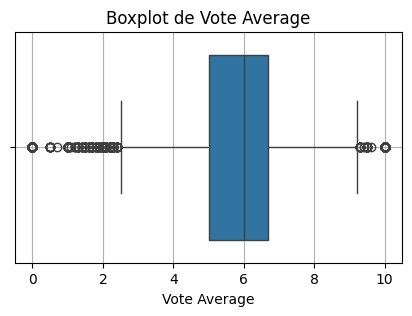

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['vote_average'])

# Configuraciones del gráfico
plt.title('Boxplot de Vote Average')
plt.xlabel('Vote Average')
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [11]:
#Por lo que pude investigar en google, varias de las peliculas con 0.0 de promedio de voto, sí tienen votos y algunas muy buenas. Por lo tanto, 
#serían recomendadas por su puntaje bajo aunque así no lo fuera. Asi que para evitar ese error y al ser sólo el 5% del df, las borro.
df = df[df['vote_average'] != 0.0]

In [18]:
df['release_year'].value_counts()

release_year
2014.0    1566
2013.0    1524
2015.0    1453
2012.0    1366
2011.0    1318
          ... 
1902.0       2
1890.0       2
1891.0       2
1878.0       1
1883.0       1
Name: count, Length: 129, dtype: int64

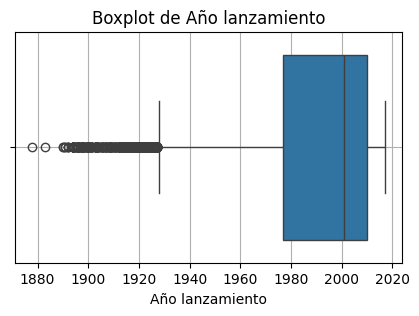

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['release_year'])

# Configuraciones del gráfico
plt.title('Boxplot de Año lanzamiento')
plt.xlabel('Año lanzamiento')
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [19]:
#Chequeo cuántas películas del siglo XIX y principios del XX hay:
df_filtro_anios = df[(df['release_year'] >= 1874) & (df['release_year'] <= 1930)]
conteo_anios = df_filtro_anios['release_year'].value_counts().sort_index()
print("Conteo de valores entre 1874 y 1930:")
conteo_anios

Conteo de valores entre 1874 y 1930:


release_year
1878.0     1
1883.0     1
1890.0     2
1891.0     2
1892.0     3
1894.0    13
1895.0     5
1896.0    13
1897.0     7
1898.0    13
1899.0     5
1900.0    10
1901.0     8
1902.0     2
1903.0    18
1904.0     6
1905.0     4
1906.0     6
1907.0     7
1908.0     6
1909.0     9
1910.0     5
1911.0     5
1912.0    11
1913.0     9
1914.0    18
1915.0    24
1916.0    27
1917.0    10
1918.0    10
1919.0    20
1920.0    23
1921.0    30
1922.0    25
1923.0    21
1924.0    34
1925.0    31
1926.0    41
1927.0    30
1928.0    58
1929.0    53
1930.0    61
Name: count, dtype: int64

In [20]:
#Veo las películas antiguas, sus títulos y promedio de votos para ver si no hubo errores al escribir los años en el df.
df_acotado = df[['release_year', 'title', 'original_language', 'vote_average']]
filas_1900 = df_acotado[df_acotado['release_year'] == 1900]# busqué al azar en 1896 y 1894 también
print("Filas que corresponden al año 1900:")
filas_1900

Filas que corresponden al año 1900:


,release_year,title,original_language,vote_average
25184,1900.0,The Kiss,en,4.5
36528,1900.0,Panorama of Eiffel Tower,en,6.5
36529,1900.0,Eiffel Tower from Trocadero Palace,en,3.0
36530,1900.0,Palace of Electricity,en,5.5
36531,1900.0,Champs de Mars,en,6.3
36532,1900.0,Scene from the Elevator Ascending Eiffel Tower,en,6.5
44615,1900.0,Grandma's Reading Glass,en,6.5
44616,1900.0,Let Me Dream Again,en,6.0
45364,1900.0,The One-Man Band,fr,6.5
45365,1900.0,The Fat and Lean Wrestling Match,fr,6.5


In [ ]:
#Luego de buscar en google peliculas de la lista al azar, sus release_year coinciden, están bien. Pero calculo que hoy en día nadie espera que le
#recomienden un documental del parque de la torre Eiffel del siglo XIX. Por lo tanto, basándome en el boxplot, elimino las películas más antiguas
#que 1930.

In [12]:
df = df[(df['release_year'] < 1874) | (df['release_year'] > 1929)]

In [13]:
df['genres'].value_counts() 
#Desanido para ver de recomendar peliculas por nombre, promedio de votos y genero.

genres
[{'id': 18, 'name': 'Drama'}]                                                                                                                                           3573
[{'id': 35, 'name': 'Comedy'}]                                                                                                                                          2881
[{'id': 99, 'name': 'Documentary'}]                                                                                                                                     2103
[]                                                                                                                                                                      1333
[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]                                                                                                         1034
                                                                                                                                

In [14]:
generos_y_peliculas_df = df[['genres', 'title', 'vote_average']]
generos_y_peliculas_df.head(3)

,genres,title,vote_average
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,7.7
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,6.9
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,6.5


In [15]:
# Para desanidar la columna 'genre'

import ast

# Para convertir la columna 'genres' de string a una lista de diccionarios
generos_y_peliculas_df['genres'] = generos_y_peliculas_df['genres'].apply(ast.literal_eval)

# Para expandir la columna 'genres' manteniendo la referencia a la película
desanidado = generos_y_peliculas_df.explode('genres')  # Esto expande cada lista de géneros en filas individuales y garantiza que cada género quede asociado al titulo correspondiente de la columna ´title´
desanidado = pd.concat([  #con concat combinamos las columnas separadas de generos con la columna 'title' 
    desanidado.drop(columns=['genres']),
    desanidado['genres'].apply(pd.Series)  # acá separamos claves 'id' y 'name'
], axis=1)

C:\Users\nahue\AppData\Local\Temp\ipykernel_6020\3875418050.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generos_y_peliculas_df['genres'] = generos_y_peliculas_df['genres'].apply(ast.literal_eval)


In [16]:
print(desanidado)
#La columna '0' se forma porque los datos faltantes se expanden a esa columna adicional.

            title  vote_average       id       name   0
0       Toy Story           7.7     16.0  Animation NaN
0       Toy Story           7.7     35.0     Comedy NaN
0       Toy Story           7.7  10751.0     Family NaN
1         Jumanji           6.9     12.0  Adventure NaN
1         Jumanji           6.9     14.0    Fantasy NaN
...           ...           ...      ...        ...  ..
45374  Robin Hood           5.7     28.0     Action NaN
45374  Robin Hood           5.7  10749.0    Romance NaN
45376    Betrayal           3.8     28.0     Action NaN
45376    Betrayal           3.8     18.0      Drama NaN
45376    Betrayal           3.8     53.0   Thriller NaN

[76203 rows x 5 columns]


In [17]:
desanidado = desanidado.drop(columns=[0])
desanidado

,title,vote_average,id,name
0,Toy Story,7.7,16.0,Animation
0,Toy Story,7.7,35.0,Comedy
0,Toy Story,7.7,10751.0,Family
1,Jumanji,6.9,12.0,Adventure
1,Jumanji,6.9,14.0,Fantasy
...,...,...,...,...
45374,Robin Hood,5.7,28.0,Action
45374,Robin Hood,5.7,10749.0,Romance
45376,Betrayal,3.8,28.0,Action
45376,Betrayal,3.8,18.0,Drama


In [18]:
desanidado.to_csv('df_generos_titulo_votos.csv', index=False)

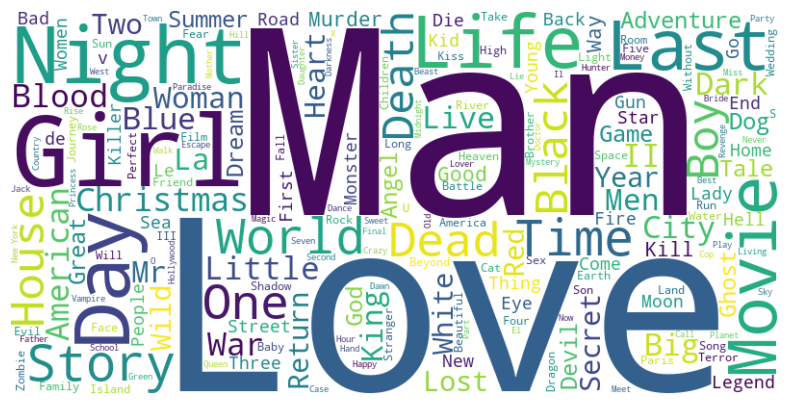

In [25]:
#Para realizar la nube de palabras:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Uno todos los títulos de las películas en un solo texto
text = " ".join(titulo for titulo in df['title'])

# Genero la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Visualización de la nube
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
#Luego de usar las otras columnas para filtrar y acotar el df, las columnas que me quedo para la función de recomendación por titulo y promedio de voto son:
df_para_recomendacion = df[['vote_average', 'title']]
df_para_recomendacion

,vote_average,title
0,7.7,Toy Story
1,6.9,Jumanji
2,6.5,Grumpier Old Men
3,6.1,Waiting to Exhale
4,5.7,Father of the Bride Part II
...,...,...
45371,7.0,Shadow of the Blair Witch
45372,7.0,The Burkittsville 7
45373,3.5,Caged Heat 3000
45374,5.7,Robin Hood


In [36]:
df_para_recomendacion.to_csv('df_para_recomendacion.csv', index=False)